# Calculate mean precipitation per subsubcatchment

This Notebook calculates the mean of the NRR forcing per subsubcatchment. For each time step, the mean precipitation is calculated per subsubcatchment. This forcing is needed for the HBV-D-HYDRO coupled model.

## Import required packages

In [1]:
import xarray as xr
import geopandas as gpd
import rasterio.mask
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pytz

C:\Users\924259\AppData\Local\Temp\ipykernel_10508\30543826.py:2: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


## Load the shapefile of the subcatchments

In [2]:
shapeloc = r"C:\Users\924259\OneDrive - Royal HaskoningDHV\Documents\Master thesis Daan Idsinga\Data\Precipitation - NRR\Subsubcatchments"

In [3]:
gdf = gpd.read_file(f'{shapeloc}/GEU_HBV_deelstroomgeb_Dhydro2022_met_neerslagregios.shp')

### Set the CRS to EPSG: 4326

In [4]:
gdf.to_crs(4326, inplace=True)

### Check shapefile

<Axes: >

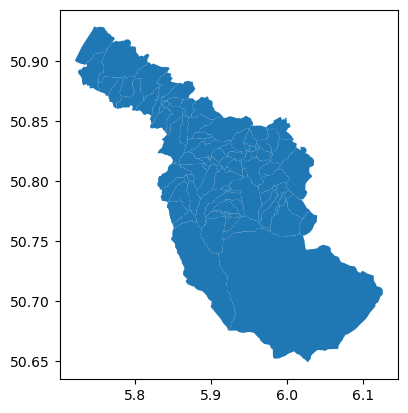

In [5]:
gdf.plot()

## Calibration period

### Open the precipitation dataset of the calibration period

In [6]:
nc_file = r"C:\Users\924259\Documents\NRR_output_calibration\NRR_data_calibration_org.nc"
ds_cal = xr.open_dataset(nc_file)

### Calculate the mean precipitation values per subcatchment

In [7]:
mean_precip_values_per_area = []

# Define the desired shape based on the NetCDF data's dimensions
desired_shape = ds_cal['precipitation'].isel(time=0).shape[-2:]

# Step 3: Calculate the mean precipitation per area and per timestep
for idx, row in gdf.iterrows():
    polygon = row['geometry']
    
    # Initialize an empty mask with the desired shape
    mask = np.zeros(desired_shape, dtype=bool)
    
    # Use rasterio.mask.geometry_mask to create a mask for the polygon
    mask = rasterio.mask.geometry_mask([polygon], out_shape=mask.shape, transform=ds_cal.rio.transform(), all_touched = True)
    
    # Reverse mask, subcatchment of interest is set True
    mask = ~mask

    # Apply the mask to each timestep and calculate the mean precipitation
    mean_precip_values_per_timestep = []
    for time_idx in range(ds_cal.dims['time']):
        masked_data = ds_cal['precipitation'].isel(time=time_idx).where(mask)
        mean_precip_value = np.nanmean(masked_data)
        mean_precip_values_per_timestep.append(mean_precip_value)
    
    # Store the mean precipitation values per timestep for the current area
    mean_precip_values_per_area.append(mean_precip_values_per_timestep)

# Step 4: Add the mean precipitation values per timestep to the GeoDataFrame as a new column
gdf['mean_precipitation_per_timestep'] = mean_precip_values_per_area

# Now, 'gdf' contains a new column 'mean_precipitation_per_timestep' with the mean values per timestep for each area.
print(gdf)

    Join_Count  TARGET_FID       name  ET_ID   Qmeter    Shape_Leng  \
0            1           1  10.001_01      0  10.Q.36   6675.281359   
1            1           2  10.001_02      1  10.Q.36   7676.217005   
2            1           3  10.001_03      2  10.Q.36  12889.410623   
3            1           4  10.001_04      3  10.Q.36   9756.677717   
4            1           5  10.001_05      4  10.Q.36   7743.873426   
..         ...         ...        ...    ...      ...           ...   
93           1          94     13.010     93  13.Q.34   7320.357210   
94           1          95     13.515     94  13.Q.34   7759.520359   
95           1          96    13.H.25     95  13.Q.34   7273.230039   
96           1          97    13.Q.34     96  13.Q.34   2535.237386   
97           1          98     9.Q.xx     97  10.Q.36  11292.915359   

      Shape_Area    REGIO                                           geometry  \
0   2.029174e+06  De Bilt  POLYGON ((5.77733 50.88569, 5.77504 50.8

In [8]:
polygon = row['geometry']

## Validation period

### Open the potential evaporation dataset of the validation period

In [9]:
nc_file = r"C:\Users\924259\Documents\NRR_output_validation\NRR_data_validation_org.nc"
ds_val = xr.open_dataset(nc_file)

### Calculate the mean precipitation values per subcatchment

In [10]:
mean_precip_values_per_area = []

# Define the desired shape based on the NetCDF data's dimensions
desired_shape = ds_val['precipitation'].isel(time=0).shape[-2:]

# Step 3: Calculate the mean precipitation per area and per timestep
for idx, row in gdf.iterrows():
    polygon = row['geometry']
    
    # Initialize an empty mask with the desired shape
    mask = np.zeros(desired_shape, dtype=bool)
    
    # Use rasterio.mask.geometry_mask to create a mask for the polygon
    mask = rasterio.mask.geometry_mask([polygon], out_shape=mask.shape, transform=ds_val.rio.transform(), all_touched = True)
    
    # Reverse mask, subcatchment of interest is set True
    mask = ~mask
    
    # Apply the mask to each timestep and calculate the mean precipitation
    mean_precip_values_per_timestep = []
    for time_idx in range(ds_val.dims['time']):
        masked_data = ds_val['precipitation'].isel(time=time_idx).where(mask)
        mean_precip_value = np.nanmean(masked_data)
        mean_precip_values_per_timestep.append(mean_precip_value)
    
    # Store the mean precipitation values per timestep for the current area
    mean_precip_values_per_area.append(mean_precip_values_per_timestep)

# Step 4: Add the mean precipitation values per timestep to the GeoDataFrame as a new column
gdf['mean_precipitation_per_timestep_val'] = mean_precip_values_per_area

# Now, 'gdf' contains a new column 'mean_precipitation_per_timestep' with the mean values per timestep for each area.
print(gdf)

    Join_Count  TARGET_FID       name  ET_ID   Qmeter    Shape_Leng  \
0            1           1  10.001_01      0  10.Q.36   6675.281359   
1            1           2  10.001_02      1  10.Q.36   7676.217005   
2            1           3  10.001_03      2  10.Q.36  12889.410623   
3            1           4  10.001_04      3  10.Q.36   9756.677717   
4            1           5  10.001_05      4  10.Q.36   7743.873426   
..         ...         ...        ...    ...      ...           ...   
93           1          94     13.010     93  13.Q.34   7320.357210   
94           1          95     13.515     94  13.Q.34   7759.520359   
95           1          96    13.H.25     95  13.Q.34   7273.230039   
96           1          97    13.Q.34     96  13.Q.34   2535.237386   
97           1          98     9.Q.xx     97  10.Q.36  11292.915359   

      Shape_Area    REGIO                                           geometry  \
0   2.029174e+06  De Bilt  POLYGON ((5.77733 50.88569, 5.77504 50.8

## Area mean precipitation

### Create Dataframe with the mean precipitation data per timestep per subcatchment for the calibration period

In [20]:
cal_mean = pd.DataFrame()

cal_mean['time'] = ds_cal.time.values
cal_mean.set_index('time',inplace = True)

for i in range(len(gdf)):
    cal_mean[f'{gdf.name[i]}'] = gdf['mean_precipitation_per_timestep'][i]

### Create Dataframe with the mean precipitation data per timestep per subcatchment for the validation period

In [23]:
val_mean = pd.DataFrame()

val_mean['time'] = ds_val.time.values
val_mean.set_index('time',inplace = True)

for i in range(len(gdf)):
    val_mean[f'{gdf.name[i]}'] = gdf['mean_precipitation_per_timestep_val'][i]

## Check data

<Axes: xlabel='time'>

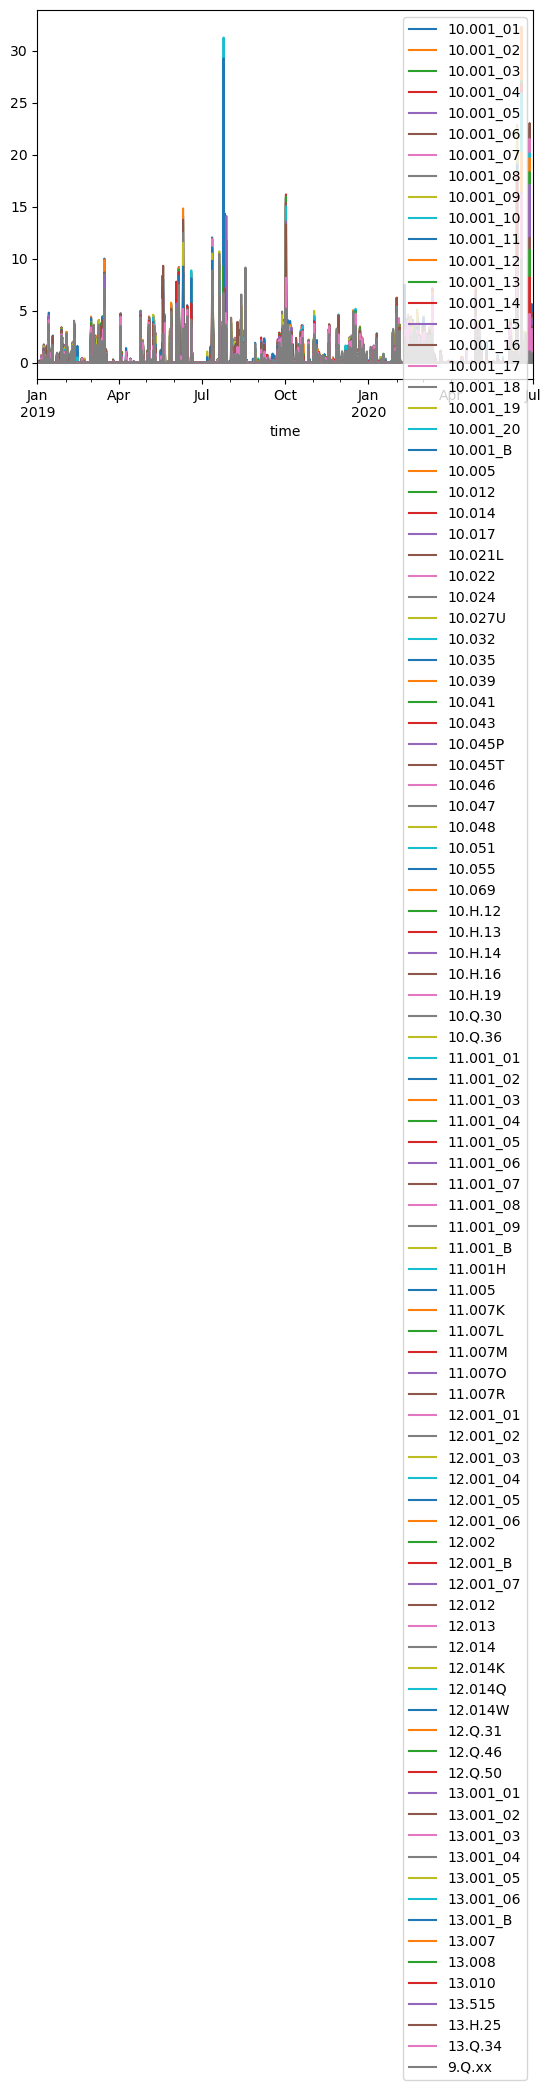

In [27]:
cal_mean.plot()

<Axes: xlabel='time'>

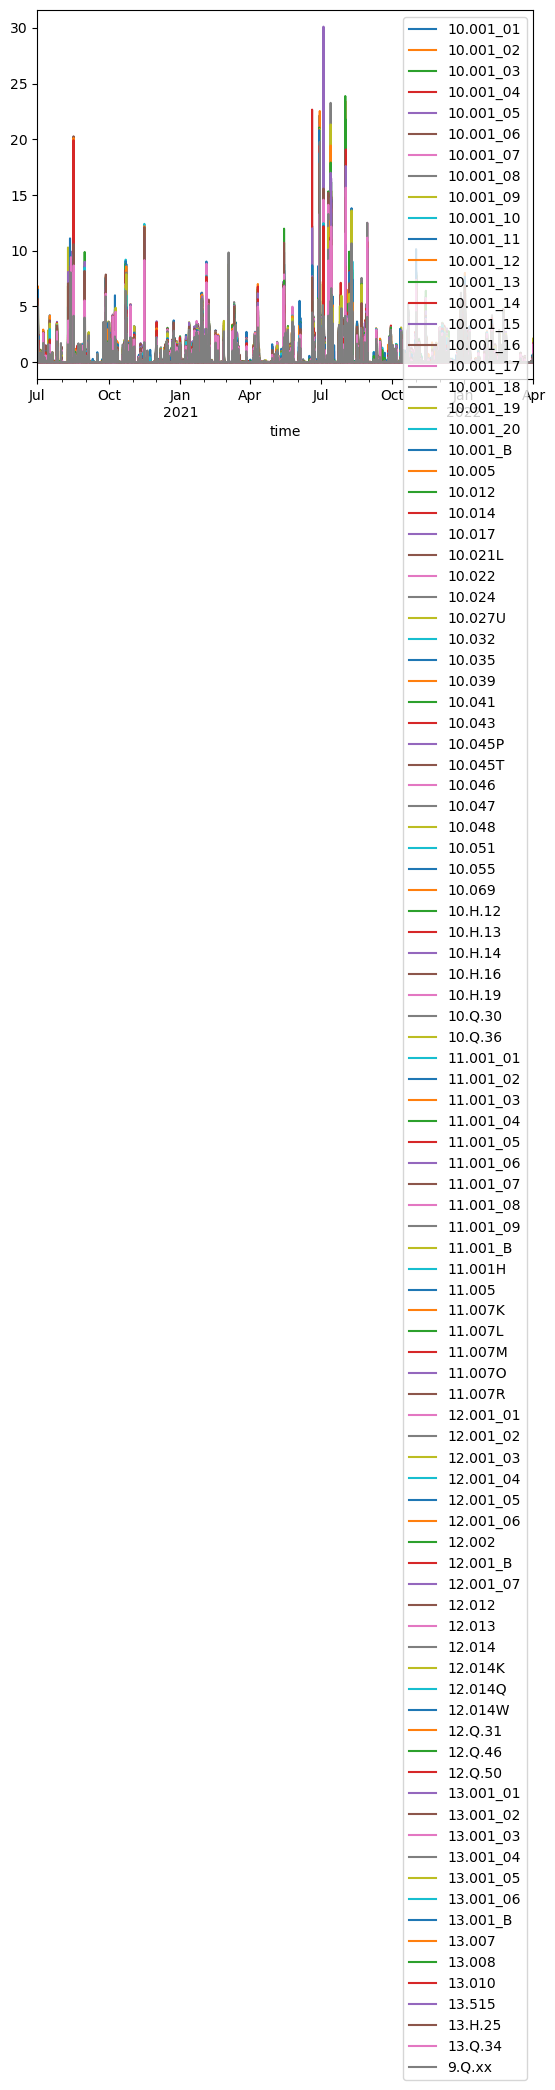

In [28]:
val_mean.plot()

## Save the calibration and validation precipitation and potential evaporation data

In [29]:
cal_mean.to_csv(f'{shapeloc}/calibration_precipitation_subsubmean.csv')

In [30]:
val_mean.to_csv(f'{shapeloc}/validation_precipitation_subsubmean.csv')